In [78]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DPI = 300
FONT_SCALE = 0.5
sns.set_palette('muted')
sns.set(font_scale=FONT_SCALE)

In [79]:
results_folder = Path('results/run_2')
df_diff = pd.read_csv(results_folder / 'results_csd3.csv', index_col=0)
df_diff.head()

,write_time_total,write_time_avg,write_throughput,read_time_total,read_time_avg,read_throughput,n_workers,n_samples,file_size
0,44.538051,0.438755,2299.157616,85.089271,0.844068,1203.441970,1,100,1024
1,22.712146,0.435903,4508.600902,42.767798,0.836326,2394.324831,2,100,1024
2,11.638815,0.435000,8798.146242,21.437839,0.828509,4776.600844,4,100,1024
3,9.641189,0.515099,10621.096259,17.044517,0.950793,6007.797181,6,100,1024
4,9.121017,0.634010,11226.818557,17.352956,1.267720,5901.011808,8,100,1024


Plot write test metrics

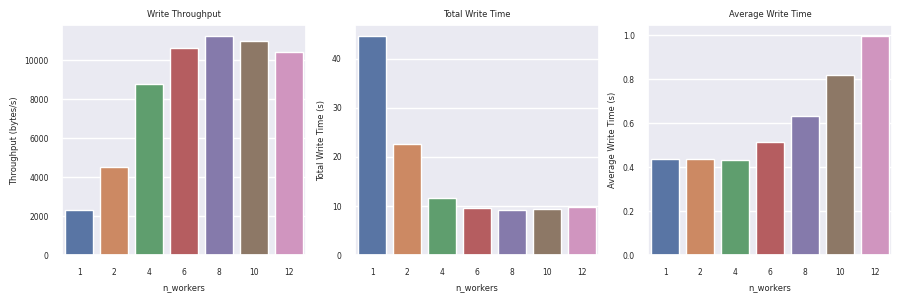

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='write_throughput', x='n_workers', ax=ax1)
sns.barplot(df_diff, y='write_time_total', x='n_workers', ax=ax2)
sns.barplot(df_diff, y='write_time_avg', x='n_workers', ax=ax3)
ax1.set_title('Write Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Write Time')
ax2.set_ylabel('Total Write Time (s)')
ax3.set_title('Average Write Time')
ax3.set_ylabel('Average Write Time (s)')
plt.tight_layout()

Plot read test metrics

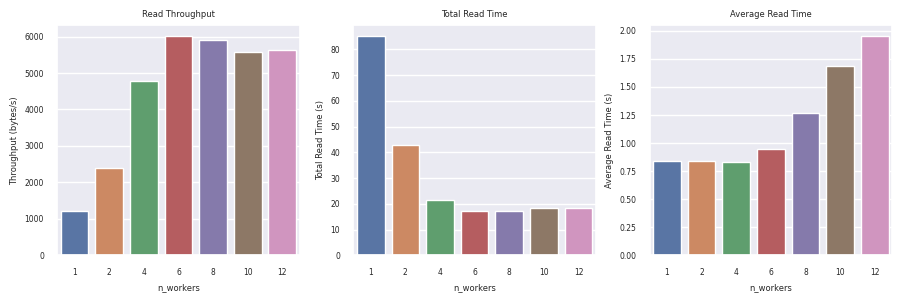

In [81]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='read_throughput', x='n_workers', ax=ax1)
sns.barplot(df_diff, y='read_time_total', x='n_workers', ax=ax2)
sns.barplot(df_diff, y='read_time_avg', x='n_workers', ax=ax3)
ax1.set_title('Read Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Read Time')
ax2.set_ylabel('Total Read Time (s)')
ax3.set_title('Average Read Time')
ax3.set_ylabel('Average Read Time (s)')
plt.tight_layout()

Compare between different endpoints

In [82]:
df_stfc = pd.read_csv(results_folder / 'results_stfc.csv', index_col=0)
df_stfc['endpoint'] = 'stfc'
df_csd3 = pd.read_csv(results_folder / 'results_csd3.csv', index_col=0)
df_csd3['endpoint'] = 'csd3'
df_csd3_local = pd.read_csv(results_folder / 'results_csd3_login.csv', index_col=0)
df_csd3_local['endpoint'] = 'csd3_local'
df_aws = pd.read_csv(results_folder / 'results_aws.csv', index_col=0)
df_aws['endpoint'] = 'aws'
df_diff = pd.concat([df_csd3, df_csd3_local, df_stfc, df_aws])
df_diff.head()

,write_time_total,write_time_avg,write_throughput,read_time_total,read_time_avg,read_throughput,n_workers,n_samples,file_size,endpoint
0,44.538051,0.438755,2299.157616,85.089271,0.844068,1203.441970,1,100,1024,csd3
1,22.712146,0.435903,4508.600902,42.767798,0.836326,2394.324831,2,100,1024,csd3
2,11.638815,0.435000,8798.146242,21.437839,0.828509,4776.600844,4,100,1024,csd3
3,9.641189,0.515099,10621.096259,17.044517,0.950793,6007.797181,6,100,1024,csd3
4,9.121017,0.634010,11226.818557,17.352956,1.267720,5901.011808,8,100,1024,csd3


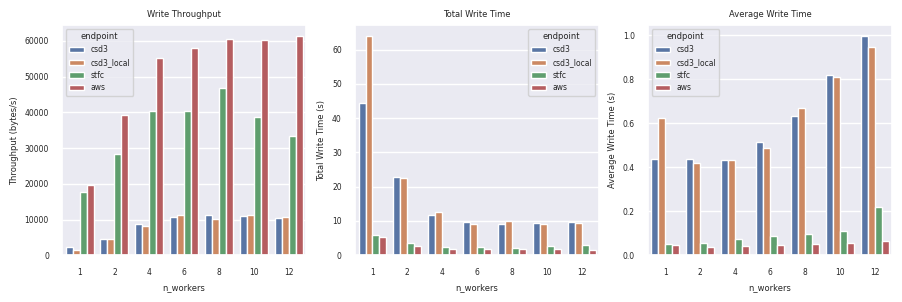

In [83]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='write_throughput', x='n_workers', hue='endpoint', ax=ax1)
sns.barplot(df_diff, y='write_time_total', x='n_workers', hue='endpoint', ax=ax2)
sns.barplot(df_diff, y='write_time_avg', x='n_workers', hue='endpoint', ax=ax3)
ax1.set_title('Write Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Write Time')
ax2.set_ylabel('Total Write Time (s)')
ax3.set_title('Average Write Time')
ax3.set_ylabel('Average Write Time (s)')
plt.tight_layout()
plt.savefig('plots/write_service_comparison.png', dpi=DPI)

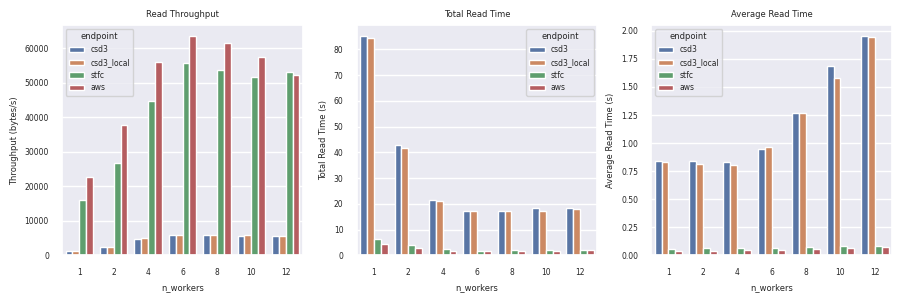

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='read_throughput', x='n_workers', hue='endpoint', ax=ax1)
sns.barplot(df_diff, y='read_time_total', x='n_workers', hue='endpoint', ax=ax2)
sns.barplot(df_diff, y='read_time_avg', x='n_workers', hue='endpoint', ax=ax3)
ax1.set_title('Read Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Read Time')
ax2.set_ylabel('Total Read Time (s)')
ax3.set_title('Average Read Time')
ax3.set_ylabel('Average Read Time (s)')
plt.tight_layout()
plt.savefig('plots/read_service_comparison.png', dpi=DPI)

In [85]:
results_folder = Path('results/run_1')
df_csd31 = pd.read_csv(results_folder / 'results_csd3.csv', index_col=0)
df_csd31['endpoint'] = 'csd3 - old'
df_csd31['run'] = 'run_1'

df_csd3_local1 = pd.read_csv(results_folder / 'results_csd3_login.csv', index_col=0)
df_csd3_local1['endpoint'] = 'csd3_local - old'

results_folder = Path('results/run_2')
df_csd32 = pd.read_csv(results_folder / 'results_csd3.csv', index_col=0)
df_csd32['endpoint'] = 'csd3 - new'
df_csd32['run'] = 'run_2'

df_csd3_local2 = pd.read_csv(results_folder / 'results_csd3_login.csv', index_col=0)
df_csd3_local2['endpoint'] = 'csd3_local - new'
df_csd3_local2['run'] = 'run_2'


df_diff = pd.concat([df_csd31, df_csd32, df_csd3_local1, df_csd3_local2])
df_diff.head()

,write_time_total,write_time_avg,write_throughput,read_time_total,read_time_avg,read_throughput,n_workers,n_samples,file_size,endpoint,run
0,60.217738,0.595759,1700.495634,117.681823,1.169681,870.142878,1,100,1024,csd3 - old,run_1
1,22.739719,0.441489,4503.133939,43.105960,0.844546,2375.541552,2,100,1024,csd3 - old,run_1
2,12.469081,0.466486,8212.313214,21.775163,0.840549,4702.605455,4,100,1024,csd3 - old,run_1
3,8.233351,0.439756,12437.219568,15.042876,0.839130,6807.208830,6,100,1024,csd3 - old,run_1
4,6.765270,0.448844,15136.128561,11.943415,0.841881,8573.762247,8,100,1024,csd3 - old,run_1


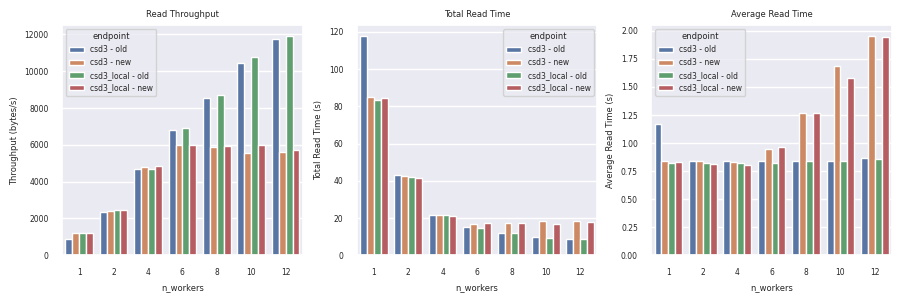

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='read_throughput', x='n_workers', hue='endpoint', ax=ax1)
sns.barplot(df_diff, y='read_time_total', x='n_workers', hue='endpoint', ax=ax2)
sns.barplot(df_diff, y='read_time_avg', x='n_workers', hue='endpoint', ax=ax3)
ax1.set_title('Read Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Read Time')
ax2.set_ylabel('Total Read Time (s)')
ax3.set_title('Average Read Time')
ax3.set_ylabel('Average Read Time (s)')
plt.tight_layout()
plt.savefig('plots/read_comparison.png', dpi=DPI)

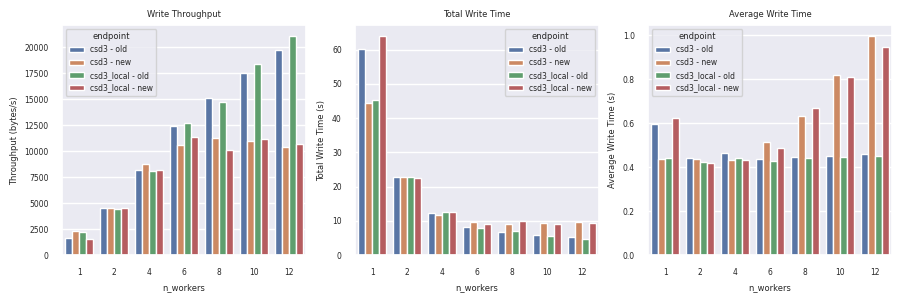

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='write_throughput', x='n_workers', hue='endpoint', ax=ax1)
sns.barplot(df_diff, y='write_time_total', x='n_workers', hue='endpoint', ax=ax2)
sns.barplot(df_diff, y='write_time_avg', x='n_workers', hue='endpoint', ax=ax3)
ax1.set_title('Write Throughput')
ax1.set_ylabel('Throughput (bytes/s)')
ax2.set_title('Total Write Time')
ax2.set_ylabel('Total Write Time (s)')
ax3.set_title('Average Write Time')
ax3.set_ylabel('Average Write Time (s)')
plt.tight_layout()
plt.savefig('plots/write_comparison.png', dpi=DPI)

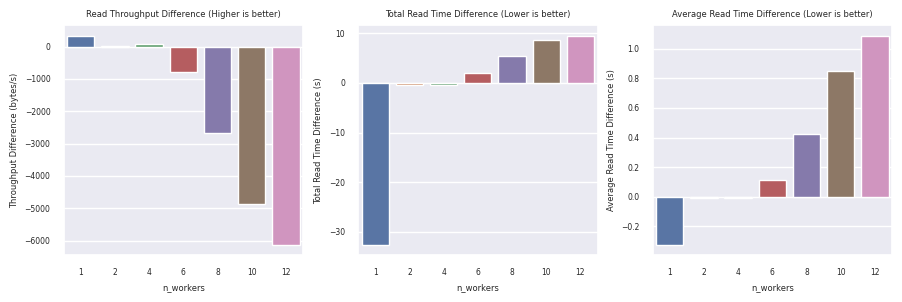

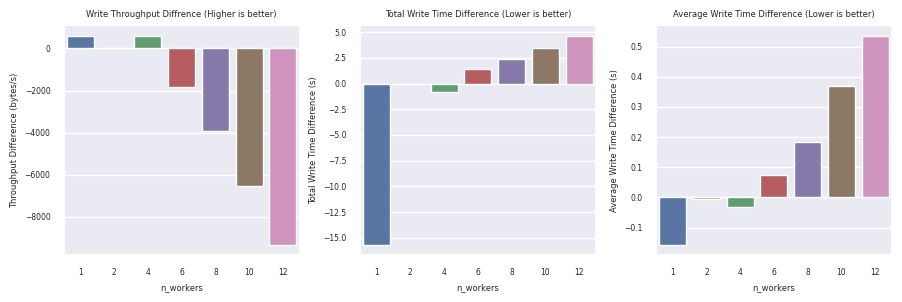

In [88]:
columns = ['read_throughput', 'read_time_total', 'read_time_avg', 'write_throughput', 'write_time_total', 'write_time_avg']
for column in columns:
    df_diff[column] = df_csd32[column] - df_csd31[column] 

df_diff['n_workers'] = df_csd31['n_workers']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='read_throughput', x='n_workers', ax=ax1)
sns.barplot(df_diff, y='read_time_total', x='n_workers', ax=ax2)
sns.barplot(df_diff, y='read_time_avg', x='n_workers', ax=ax3)
ax1.set_title('Read Throughput Difference (Higher is better)')
ax1.set_ylabel('Throughput Difference (bytes/s)')
ax2.set_title('Total Read Time Difference (Lower is better)')
ax2.set_ylabel('Total Read Time Difference (s)')
ax3.set_title('Average Read Time Difference (Lower is better)')
ax3.set_ylabel('Average Read Time Difference (s)')
plt.tight_layout()
plt.savefig('plots/read_improvement_comparison.png', dpi=DPI)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(df_diff, y='write_throughput', x='n_workers', ax=ax1)
sns.barplot(df_diff, y='write_time_total', x='n_workers', ax=ax2)
sns.barplot(df_diff, y='write_time_avg', x='n_workers', ax=ax3)
ax1.set_title('Write Throughput Diffrence (Higher is better)')
ax1.set_ylabel('Throughput Difference (bytes/s)')
ax2.set_title('Total Write Time Difference (Lower is better)')
ax2.set_ylabel('Total Write Time Difference (s)')
ax3.set_title('Average Write Time Difference (Lower is better)')
ax3.set_ylabel('Average Write Time Difference (s)')
plt.tight_layout()
plt.savefig('plots/write_improvement_comparison.png', dpi=DPI)